In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel", font="serif")

df = pd.read_csv('clean_dataset.csv')

## Correlation heatmap

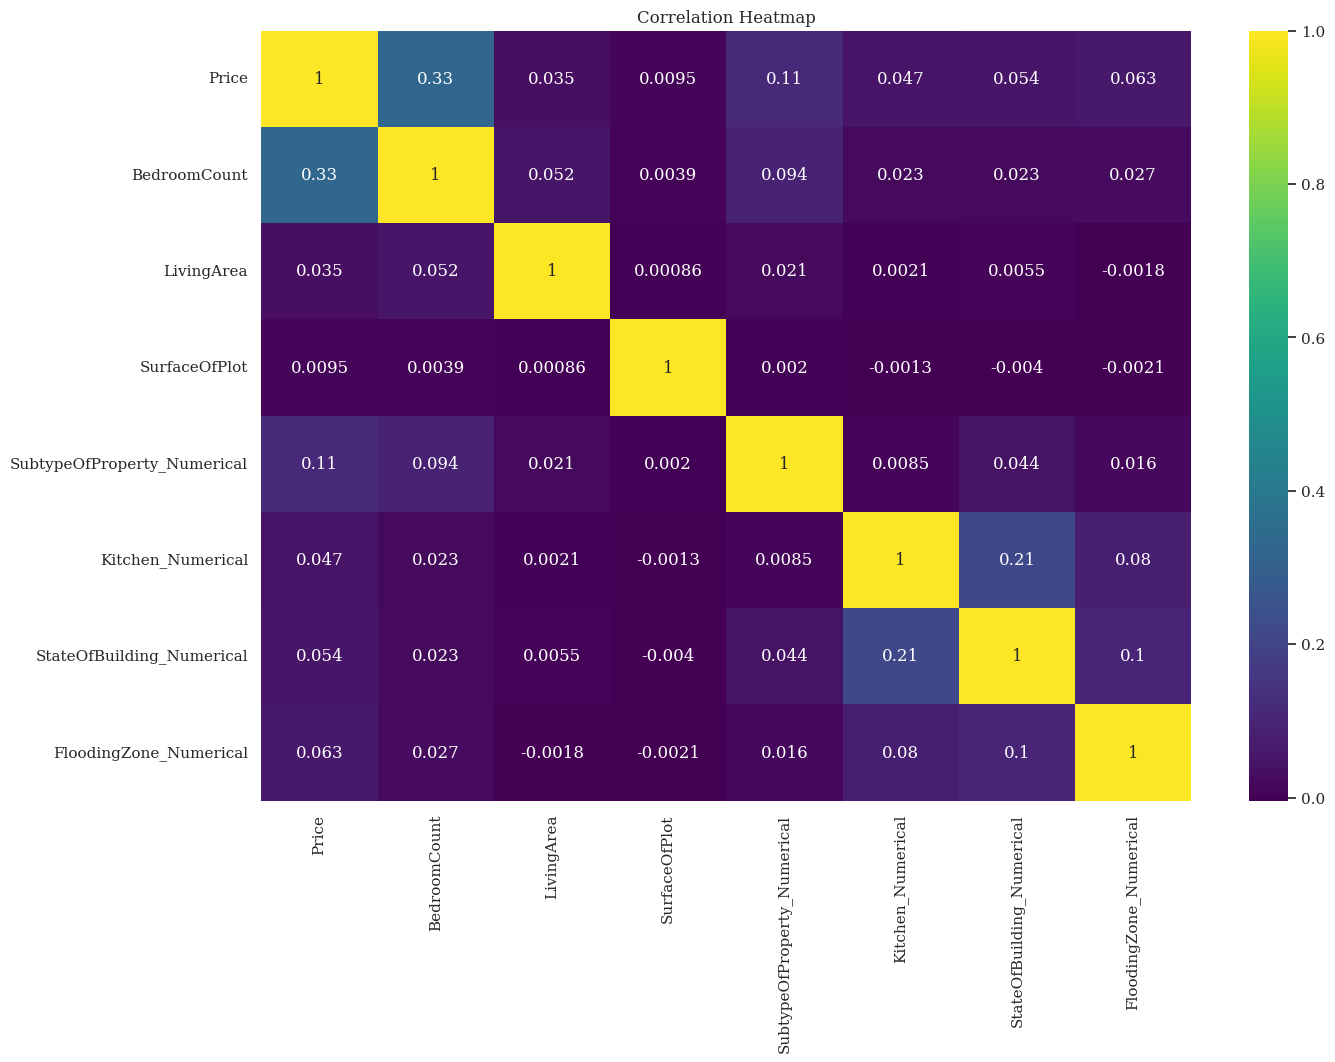

In [3]:

numerical_df = df[['Price','BedroomCount','LivingArea','SurfaceOfPlot','SubtypeOfProperty_Numerical','Kitchen_Numerical','StateOfBuilding_Numerical','FloodingZone_Numerical']]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

## BedroomCount scatter plot

### Remove outliers 

In [4]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

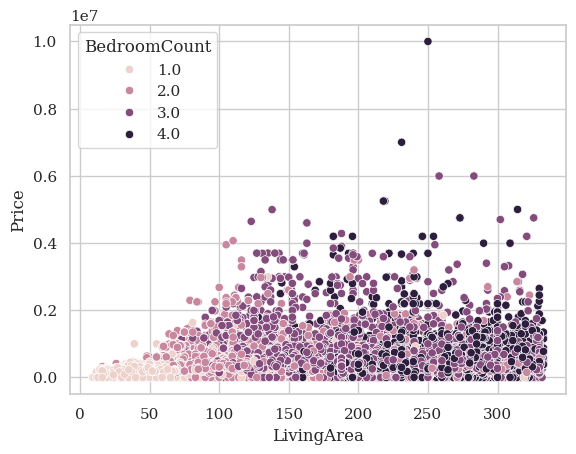

In [5]:
clean_df = df.drop(df[df.Price > 15000000].index,inplace=True)
clean_df = remove_outliers(df, "LivingArea")
clean_df = remove_outliers(clean_df, "BedroomCount")

sns.scatterplot(data=clean_df, x="LivingArea", y="Price", hue="BedroomCount")
plt.show()

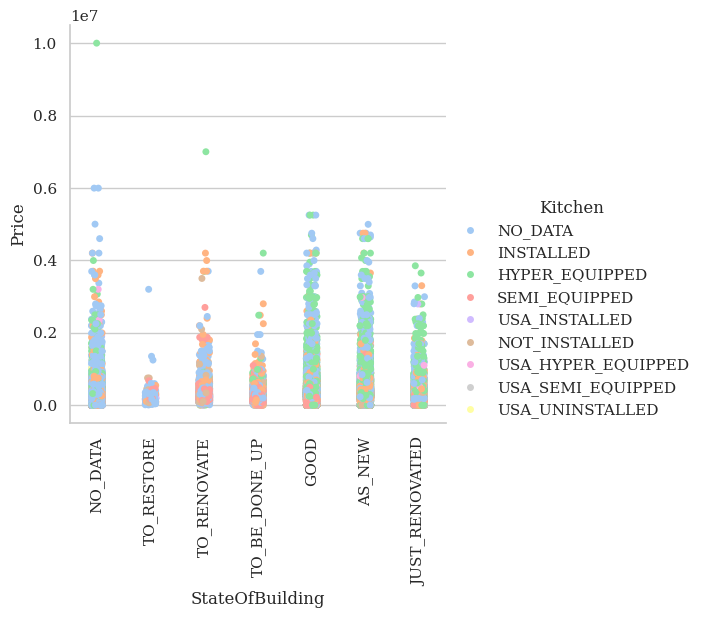

In [12]:
sns.catplot(data=clean_df, x="StateOfBuilding", y="Price", order=["NO_DATA", "TO_RESTORE", "TO_RENOVATE", "TO_BE_DONE_UP", "GOOD", "AS_NEW", "JUST_RENOVATED"], hue="Kitchen")

#g.set_axis_labels("State of the property", "Price (€)")
plt.xticks(rotation=90)
plt.show()